In [8]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans, AgglomerativeClustering
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data        
y = iris.target      
print(iris.feature_names) 
print(iris.target_names)  

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [10]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target
df = df.drop(columns='species')
print(df.head())

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


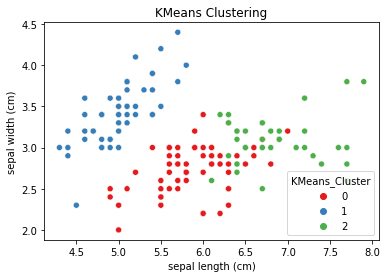

In [11]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X)
df['KMeans_Cluster'] = kmeans_labels
sns.scatterplot(data=df, x=iris.feature_names[0], y=iris.feature_names[1], hue='KMeans_Cluster', palette='Set1')
plt.title('KMeans Clustering')
plt.show()

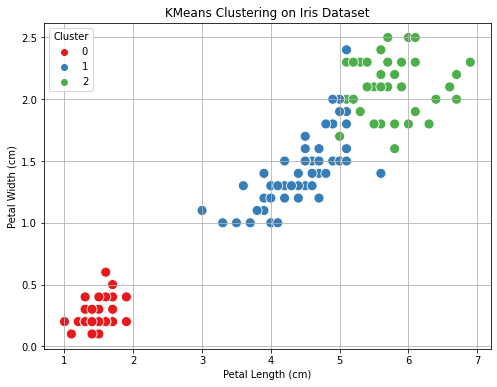

In [16]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X)
X['Cluster'] = kmeans_labels
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=X,
    x=iris.feature_names[2],  # Petal length
    y=iris.feature_names[3],  # Petal width
    hue='Cluster',
    palette='Set1',
    s=100
)
plt.title('KMeans Clustering on Iris Dataset')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

KMeans clustering is an unsupervised machine learning algorithm used to group data into K distinct clusters based on feature similarity. The following steps are involved.
Initialize: Randomly pick K cluster centroids.
Assign: Each data point is assigned to the nearest centroid (based on distance, usually Euclidean).
Update: Centroids are recalculated as the mean of all points in each cluster.
Repeat steps 2–3 until centroids stop moving significantly (i.e., convergence).

The Iris dataset contains continuous numerical features (like petal length, sepal width), which are ideal for KMeans.
We know there are 3 natural species of iris flowers — so setting K=3 is reasonable.
The clusters tend to be well-separated in the feature space, especially with petal features.


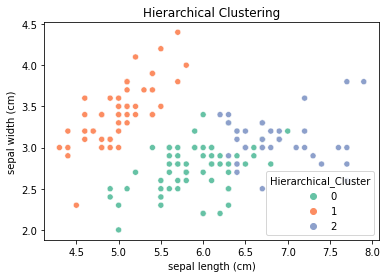

In [12]:
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(X)
df['Hierarchical_Cluster'] = hierarchical_labels
sns.scatterplot(data=df, x=iris.feature_names[0], y=iris.feature_names[1], hue='Hierarchical_Cluster', palette='Set2')
plt.title('Hierarchical Clustering')
plt.show()

Hierarchical Clustering is an unsupervised learning method that builds a hierarchy (tree-like structure) of clusters.
Agglomerative (bottom-up) – Start with each data point as its own cluster and iteratively merge the closest pairs.
Divisive (top-down) – Start with one large cluster and recursively split into smaller ones (less common in practice).
Compute the distance matrix between all data points.
Merge the two closest clusters.
Update the distance matrix.
Repeat until all data is in a single cluster or the desired number of clusters is reached

The Iris dataset has structured, separable clusters that form natural groupings.
Hierarchical clustering doesn't require pre-specifying the number of clusters (though you can choose a cutoff).
It provides a dendrogram, which is useful for visual inspection of the cluster structure.

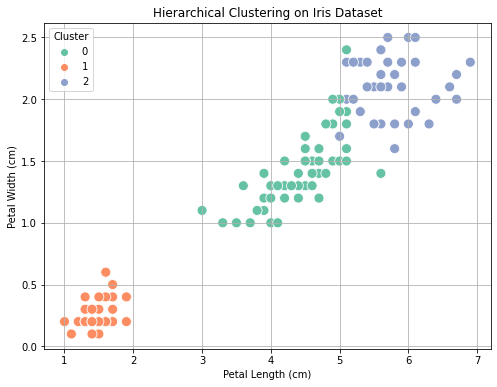

In [15]:
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical_labels = hierarchical.fit_predict(X)

# Add cluster labels for visualization
X['Cluster'] = hierarchical_labels

# Plot clusters using petal features
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=X,
    x=iris.feature_names[2],  # Petal length
    y=iris.feature_names[3],  # Petal width
    hue='Cluster',
    palette='Set2',
    s=100
)
plt.title('Hierarchical Clustering on Iris Dataset')
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()
